In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

In [2]:
df_covidDeaths = pd.read_csv('data/CovidDeaths.csv')
df_covidDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323796 entries, 0 to 323795
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    323796 non-null  object 
 1   continent                                   308394 non-null  object 
 2   location                                    323796 non-null  object 
 3   date                                        323796 non-null  object 
 4   population                                  323796 non-null  int64  
 5   total_cases                                 286549 non-null  float64
 6   new_cases                                   314782 non-null  float64
 7   new_cases_smoothed                          313523 non-null  float64
 8   total_deaths                                265511 non-null  float64
 9   new_deaths                                  314824 non-null  float64
 

In [3]:
df_covidDeaths['date'] = pd.to_datetime(df_covidDeaths['date'], format = '%Y-%m-%d')

In [4]:
df_covidDeaths.describe()

,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 63,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,323796,3.237960e+05,2.865490e+05,3.147820e+05,3.135230e+05,2.655110e+05,314824.000000,313594.000000,286549.000000,314782.000000,...,185669.000000,122904.000000,221512.000000,297776.000000,243227.000000,0.0,1.129900e+04,11299.000000,11299.000000,11299.000000
mean,2021-10-04 20:35:06.659748608,1.283914e+08,6.083091e+06,1.033544e+04,1.037549e+04,8.261107e+04,92.300784,92.652957,92737.694429,156.114453,...,32.910951,50.792066,3.097237,73.717236,0.722485,NaN,4.940835e+04,9.641480,12.050543,1561.652921
min,2020-01-01 00:00:00,4.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,NaN,-3.772610e+04,-44.230000,-95.920000,-2142.340300
25%,2020-11-20 00:00:00,4.490020e+05,7.244000e+03,0.000000e+00,7.140000e-01,1.230000e+02,0.000000,0.000000,2187.987000,0.000000,...,22.600000,20.859000,1.300000,69.590000,0.602000,NaN,6.284999e+01,0.965000,-1.390000,42.549045
50%,2021-10-05 00:00:00,5.882259e+06,6.368600e+04,4.000000e+00,3.271400e+01,1.221000e+03,0.000000,0.143000,23111.678000,0.497000,...,33.100000,49.839000,2.500000,75.050000,0.740000,NaN,5.178900e+03,7.940000,6.160000,991.247900
75%,2022-08-20 00:00:00,2.830170e+07,6.701450e+05,3.380000e+02,5.898570e+02,1.102350e+04,4.000000,6.143000,117351.753000,44.268750,...,41.300000,83.241000,4.200000,79.460000,0.829000,NaN,3.408455e+04,15.375000,17.200000,2556.390400
max,2023-07-10 00:00:00,7.975105e+09,7.677261e+08,8.401732e+06,6.402720e+06,6.948751e+06,27941.000000,14824.143000,737554.506000,228872.025000,...,78.100000,100.000000,13.800000,86.750000,0.957000,NaN,1.281224e+06,76.550000,377.430000,10292.318000
std,NaN,6.606115e+08,3.765966e+07,1.146215e+05,9.823053e+04,4.250942e+05,637.705714,581.017774,143043.267040,1208.063647,...,13.574058,31.956079,2.548291,7.396214,0.148981,NaN,1.423872e+05,12.579017,25.791689,1874.292151


In [5]:
df_covidDeaths.duplicated().sum()

0

In [6]:
def plot_lineplot(localization, df, dataShowing):

    df_filtered = df.apply(lambda row: row[df['location'].isin(localization)])
    
    plt.figure(figsize = (20, 10))
    my_plot = sns.lineplot(data=df_filtered,\
                           x='date',\
                           y=dataShowing,\
                           hue='location',\
                           sizes=(10, 20)).set_title(dataShowing)

    
    # my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    
    
    # locator = mdates.DayLocator(interval=50)
    
    # my_plot.xaxis.set_major_locator(locator)
    
    
    # set axes labels
    plt.xlabel('Date')
    plt.ylabel('Percentage (%)')
    
    plt.show()

In [7]:
def plot_bars(df, localization, dataShowing):

    df[df[dataShowing] == df.groupby('location')[dataShowing].transform(max)]
    df = df.drop_duplicates(subset=['location'], keep='last')
    
    df = df.apply(lambda row: row[df['location'].isin(localization)])
    
    
    plt.figure(figsize = (20, 10))
    sns.barplot(data = df, \
                x='location', \
                y=dataShowing).set_title(dataShowing)
    
    plt.xlabel('Counters')
    # plt.ylabel('Percentage (%)')
    plt.show()

# Shows percentage of dying if you contract covid 

In [8]:
likelihood_dying_covid = (df_covidDeaths['total_deaths'] / df_covidDeaths['total_cases']) * 100
df_covidDeaths['likelihood_dying_covid'] = likelihood_dying_covid

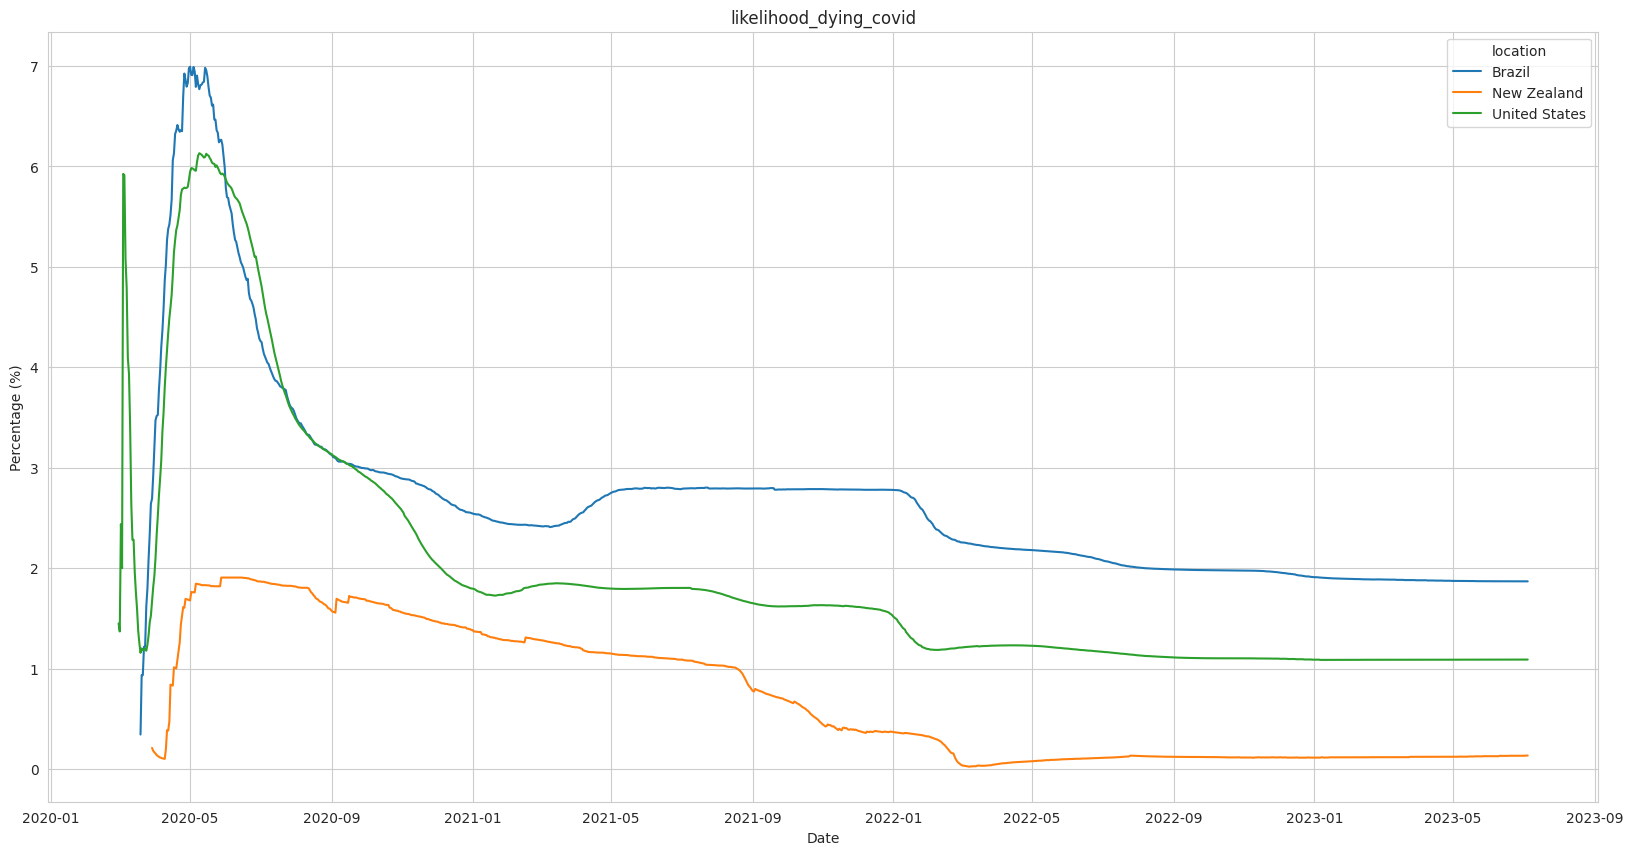

In [9]:
localization = ['Brazil', 'New Zealand', 'United States']
# localization = ['World']

plot_lineplot(localization, df_covidDeaths, 'likelihood_dying_covid')

# Shows what percentage of population got Covid

In [10]:
percentage_got_covid = (df_covidDeaths['total_cases'] / df_covidDeaths['population']) * 100
df_covidDeaths['percentage_got_covid'] = percentage_got_covid

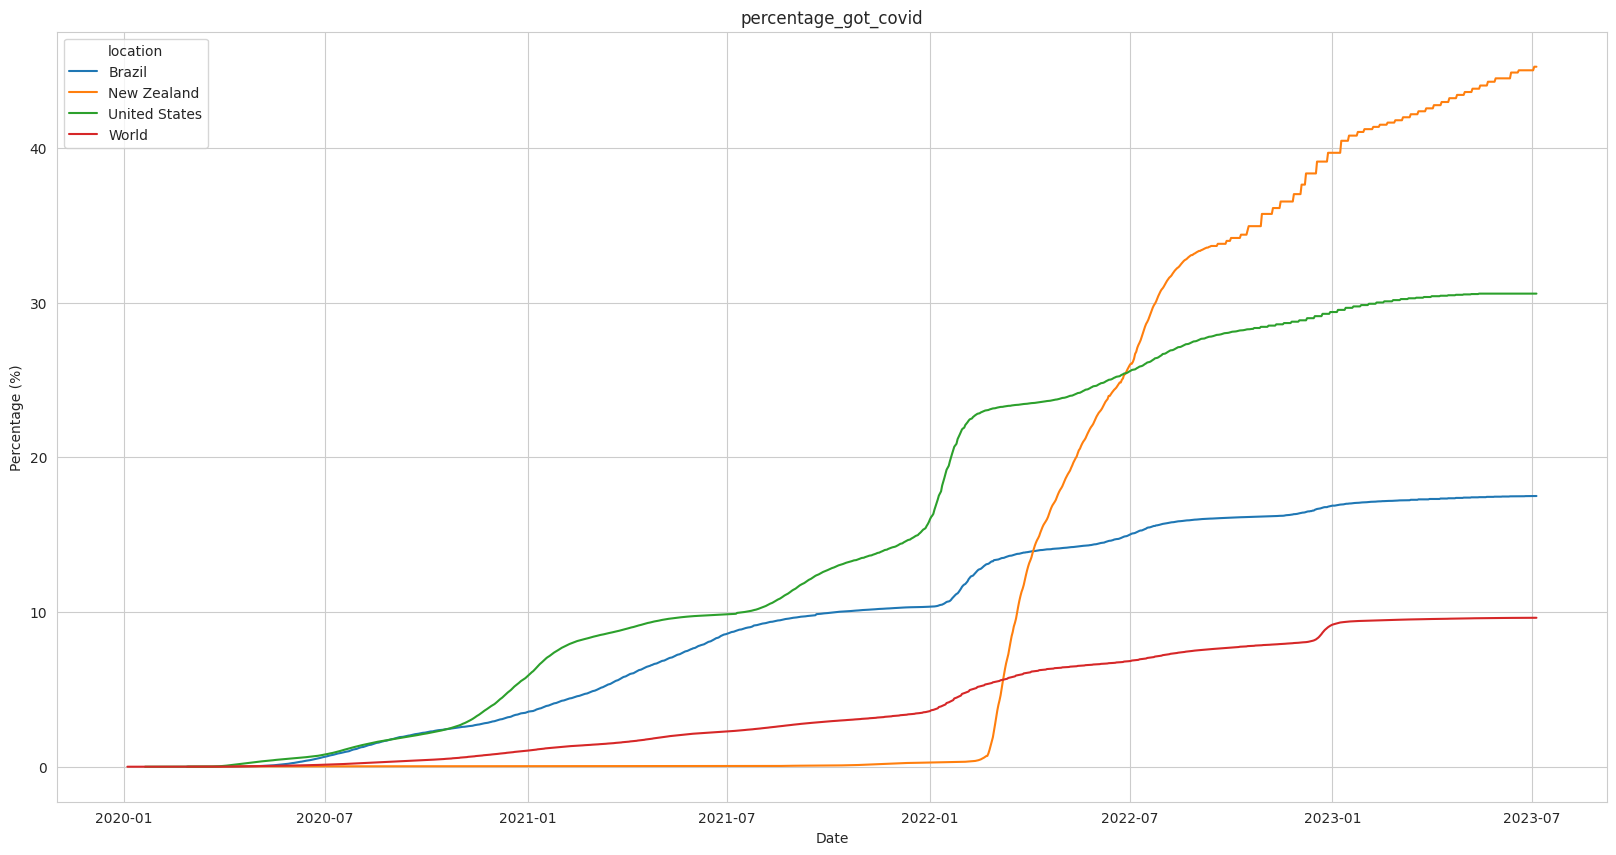

In [11]:
localization = ['Brazil', 'New Zealand', 'United States', 'World']
# localization = ['Brazil']
plot_lineplot(localization, df_covidDeaths, 'percentage_got_covid')

# Shows what percentage of population dying from Covid

In [12]:
percentage_dying_covid = (df_covidDeaths['total_deaths'] / df_covidDeaths['population']) * 100
df_covidDeaths['percentage_dying_covid'] = percentage_dying_covid

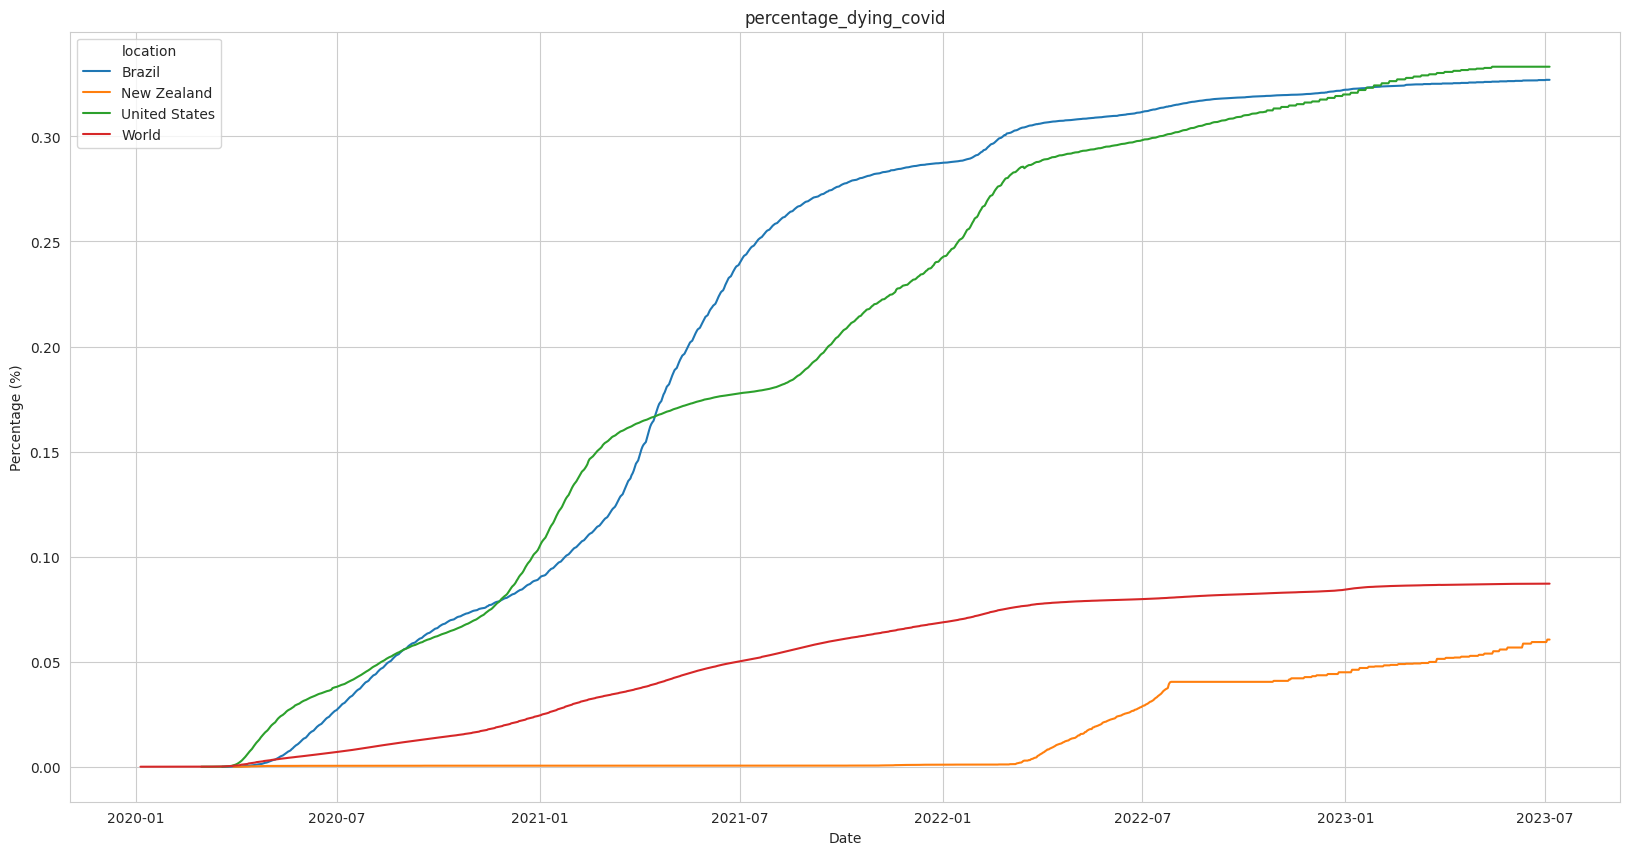

In [13]:
localization = ['Brazil', 'New Zealand', 'United States', 'World']
plot_lineplot(localization, df_covidDeaths, 'percentage_dying_covid')

# Shows maximum covid cases by country

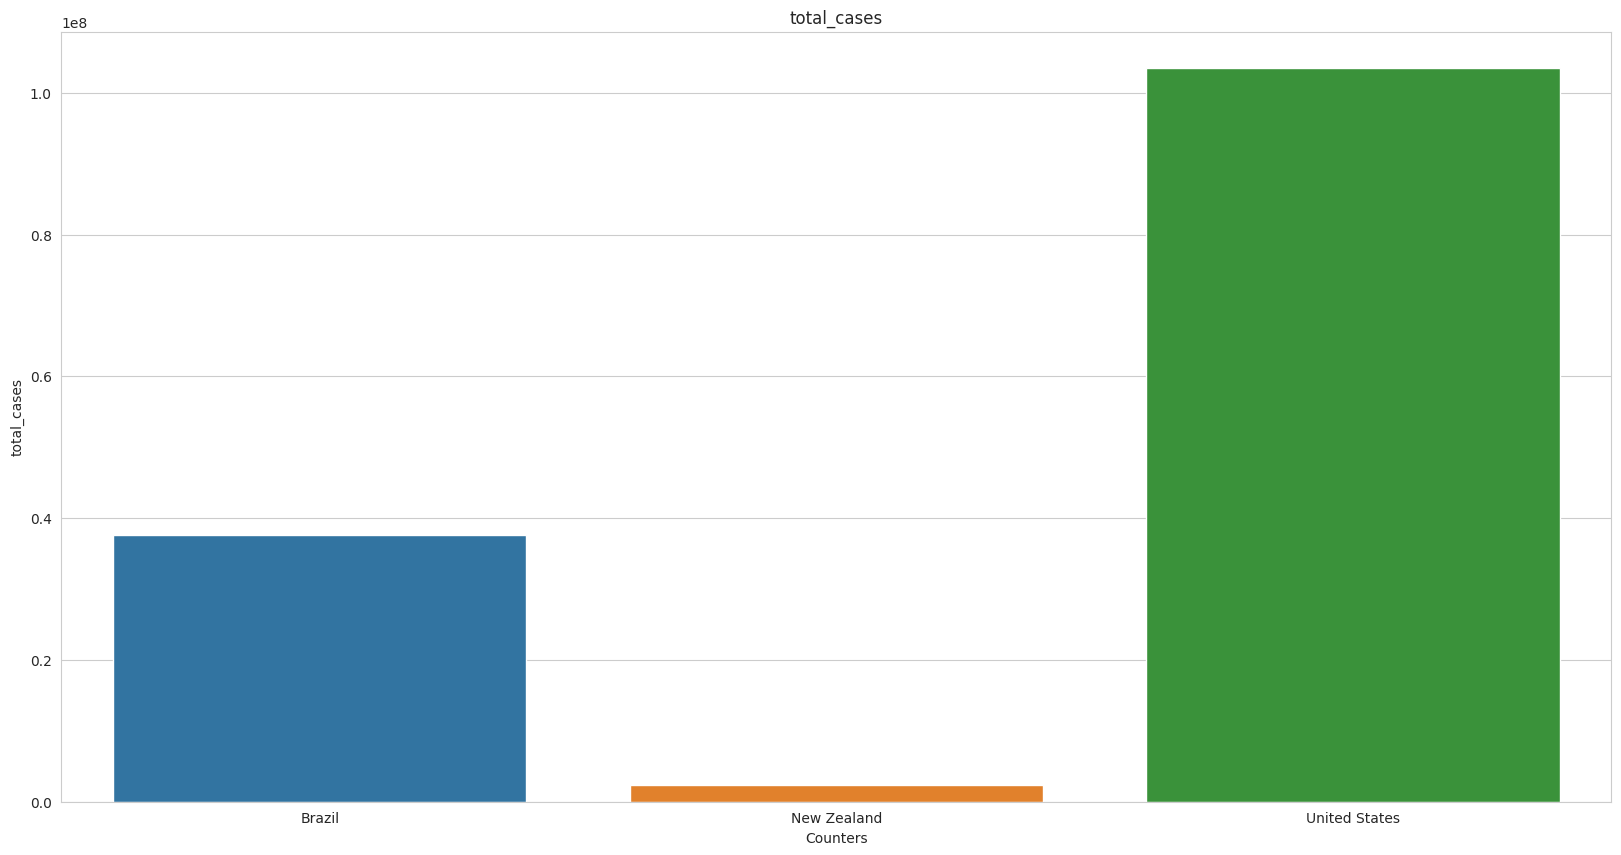

In [14]:
localization = ['Brazil', 'New Zealand', 'United States']

plot_bars(df_covidDeaths, localization, 'total_cases')

# Shows maximum covid cases by Continent

In [15]:
df_covidDeaths['total_cases_population'] = df_covidDeaths['total_cases'] / df_covidDeaths['population'] * 100

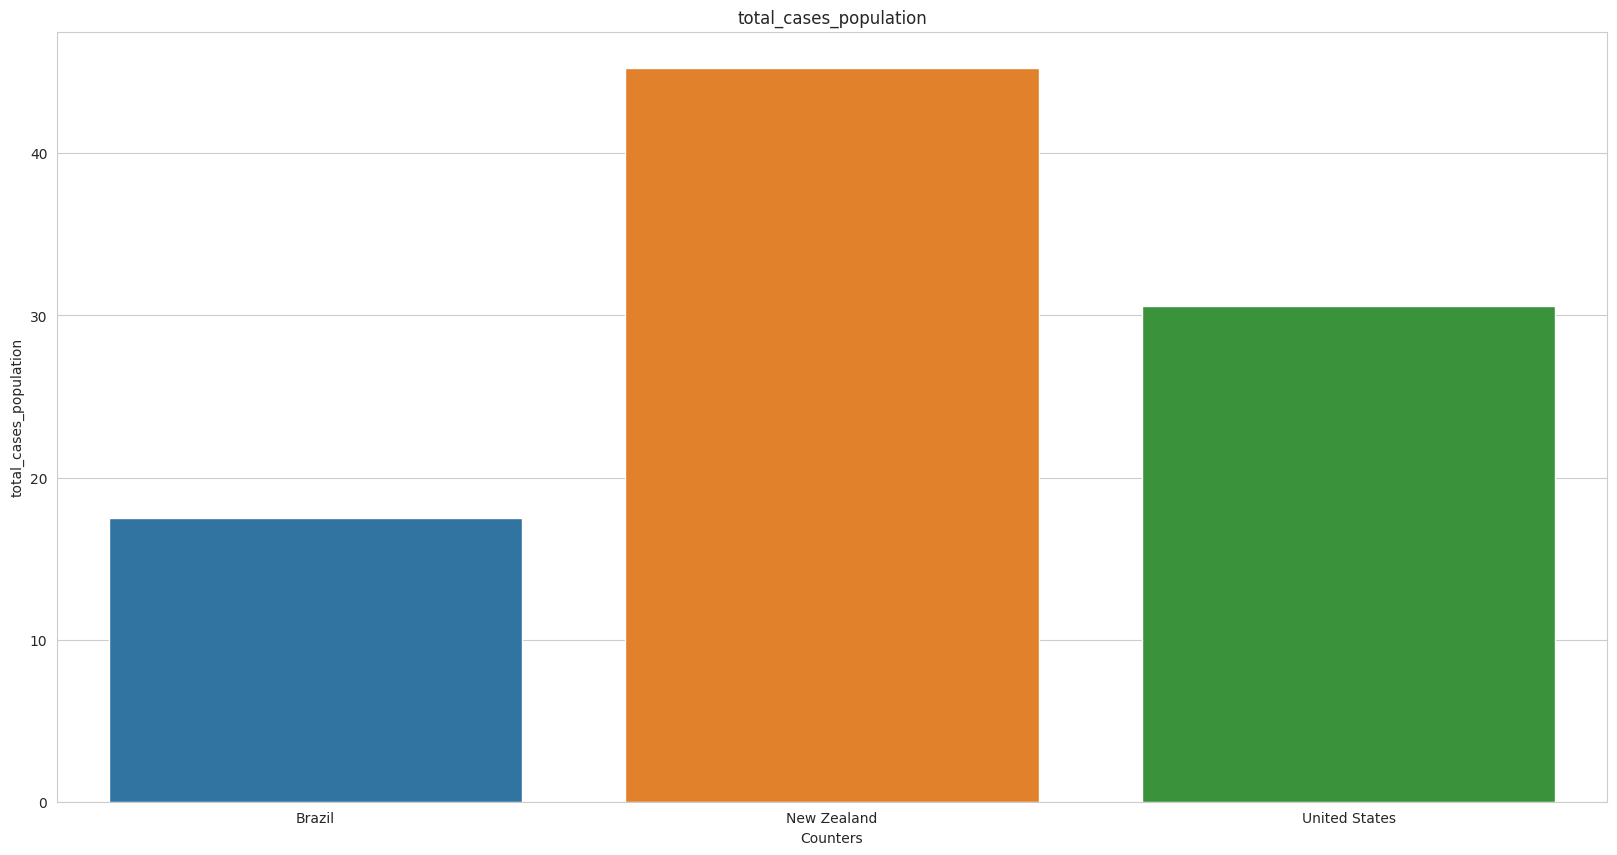

In [16]:
localization = ['Brazil', 'New Zealand', 'United States']

plot_bars(df_covidDeaths, localization, 'total_cases_population')

In [19]:
df_drop_date = df_covidDeaths[['continent','total_cases', 'population']]
df_drop_date = df_drop_date.groupby('continent', as_index =False).sum()
df_drop_date

,continent,total_cases,population
0,Africa,9.455599e+09,1825486155525
1,Asia,1.339104e+11,6050811692434
2,Europe,1.375972e+11,1037861540098
3,North America,7.812620e+10,768703138712
4,Oceania,5.804772e+09,57675978370
5,South America,4.647929e+10,559503982624


Text(0.5, 0, 'Counters')

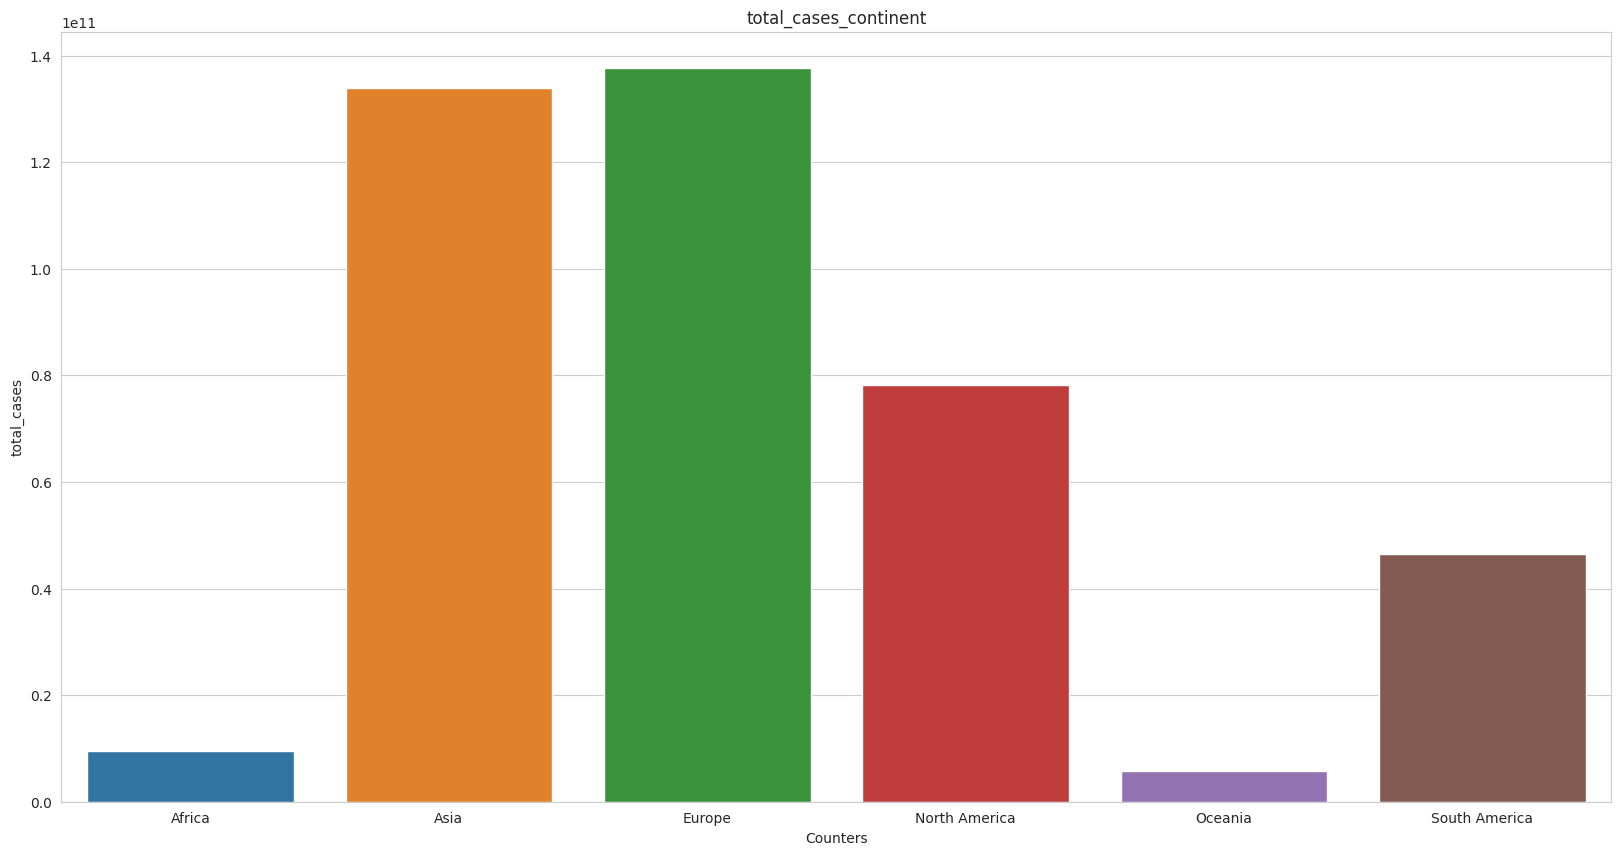

In [20]:
plt.figure(figsize = (20, 10))
sns.barplot(data = df_drop_date, \
            x='continent', \
            y='total_cases').set_title('total_cases_continent')

plt.xlabel('Counters')

In [21]:
df_covidVaccinations = pd.read_excel('data/CovidVaccinations.xlsx')
df_covidVaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              81060 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   new_tests                              38945 non-null  float64       
 5   total_tests                            38652 non-null  float64       
 6   total_tests_per_thousand               38652 non-null  float64       
 7   new_tests_per_thousand                 38945 non-null  float64       
 8   new_tests_smoothed                     44625 non-null  float64       
 9   new_tests_smoothed_per_thousand        44625 non-null  float6

In [22]:
df_covidVaccinations['test'] =  df_covidVaccinations["people_fully_vaccinated"] / df_covidVaccinations["people_vaccinated"] * 100

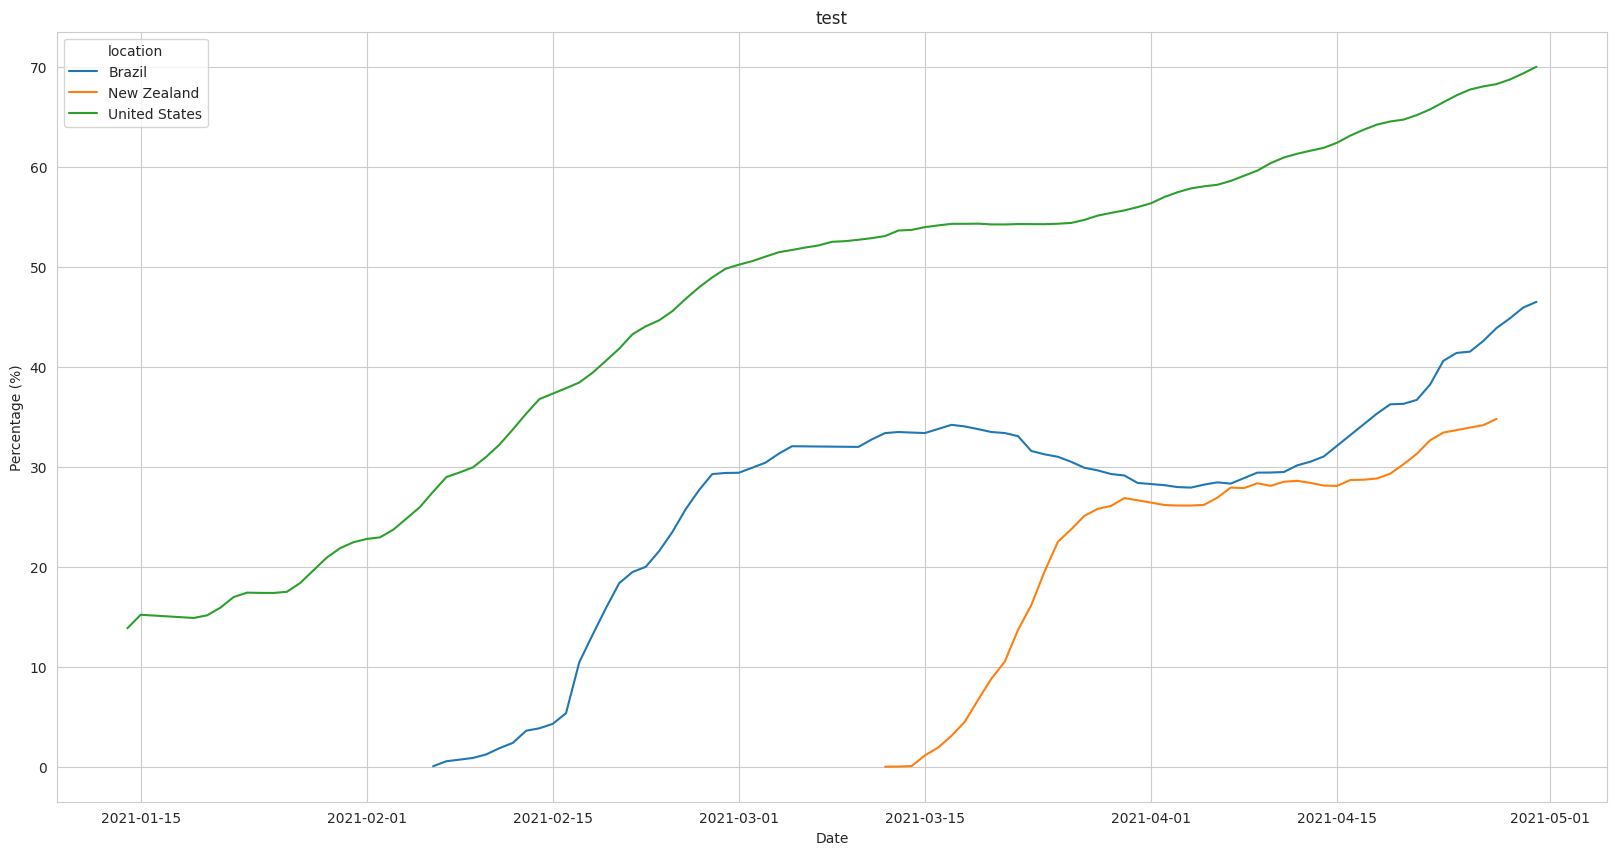

In [23]:
localization = ['Brazil', 'New Zealand', 'United States']
# localization = ['World']

plot_lineplot(localization, df_covidVaccinations, 'test')